In [25]:
!pip install pandas seaborn matplotlib scikit-learn


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split







In [61]:
df.fillna(df.mean(), inplace=True)
print(df.columns)  


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [63]:
X = df.drop('quality', axis=1) 
y = df['quality']               


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [107]:
# Asegúrate de que este código se ejecute antes de predecir
model = DecisionTreeClassifier(max_depth=5)  # Ajusta el max_depth según sea necesario
model.fit(X_train, y_train)  # Ajusta el modelo


DecisionTreeClassifier(max_depth=5)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None],  

    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_resampled, y_resampled)  

print("Mejor max_depth encontrado:", grid_search.best_params_['max_depth'])


Mejor max_depth encontrado: 20


In [75]:
pip install imbalanced-learn


In [77]:
print("Forma de X_resampled:", X_resampled.shape)
print("Forma de y_resampled:", y_resampled.shape)


Forma de X_resampled: (3306, 11)
Forma de y_resampled: (3306,)


In [79]:
best_max_depth = grid_search.best_params_['max_depth']
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_resampled, y_resampled)


DecisionTreeClassifier(max_depth=20, random_state=42)

In [81]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = final_model.predict(X_test) 
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  


Precisión: 0.540625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.20      0.10        10
           5       0.68      0.58      0.62       130
           6       0.61      0.50      0.55       132
           7       0.51      0.71      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.31      0.33      0.31       320
weighted avg       0.60      0.54      0.56       320



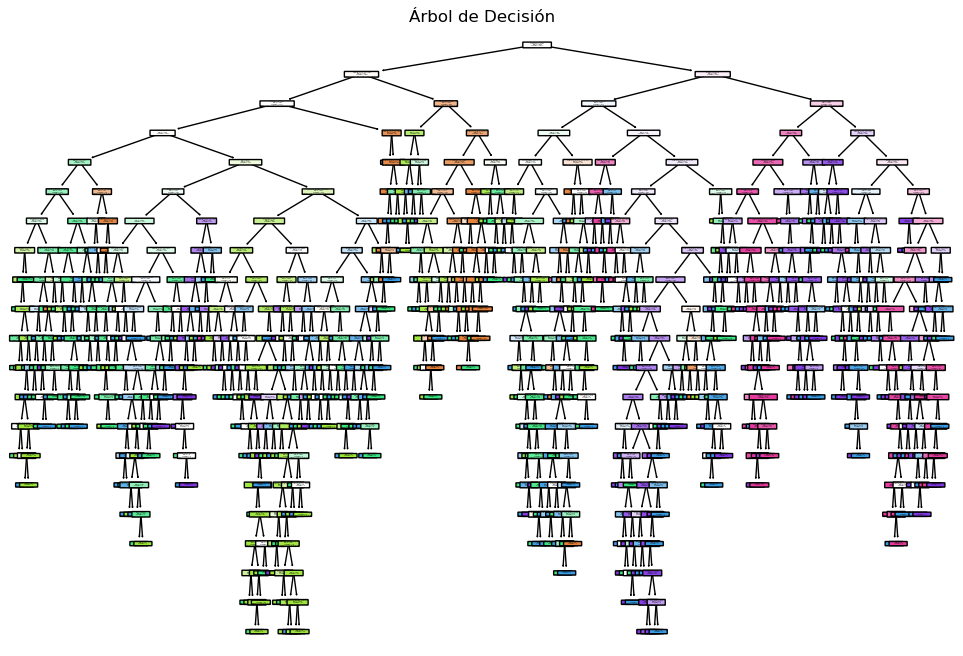

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(final_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árbol de Decisión')
plt.show()


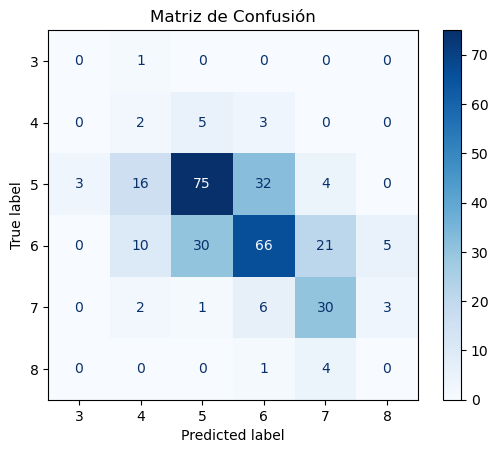

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Usar final_model en lugar de model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


In [89]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')


In [91]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X_resampled, y_resampled, cv=5, scoring='f1_weighted')
print(f'Score de validación cruzada F1: {cv_scores.mean()} ± {cv_scores.std()}')


Score de validación cruzada F1: 0.7946091950659195 ± 0.01687703571441932


In [97]:
from sklearn.dummy import DummyClassifier

# Clasificador aleatorio
dummy_model = DummyClassifier(strategy='stratified', random_state=42)
dummy_model.fit(X_train, y_train)

# Predecir con el clasificador aleatorio
y_pred_dummy = dummy_model.predict(X_test)

# Calcular métricas para el clasificador aleatorio
print("Desempeño del clasificador aleatorio:")
print("Precisión:", accuracy_score(y_test, y_pred_dummy))
print(classification_report(y_test, y_pred_dummy))


Desempeño del clasificador aleatorio:
Precisión: 0.33125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.37      0.42      0.39       130
           6       0.41      0.38      0.39       132
           7       0.06      0.05      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.33       320
   macro avg       0.14      0.14      0.14       320
weighted avg       0.33      0.33      0.33       320



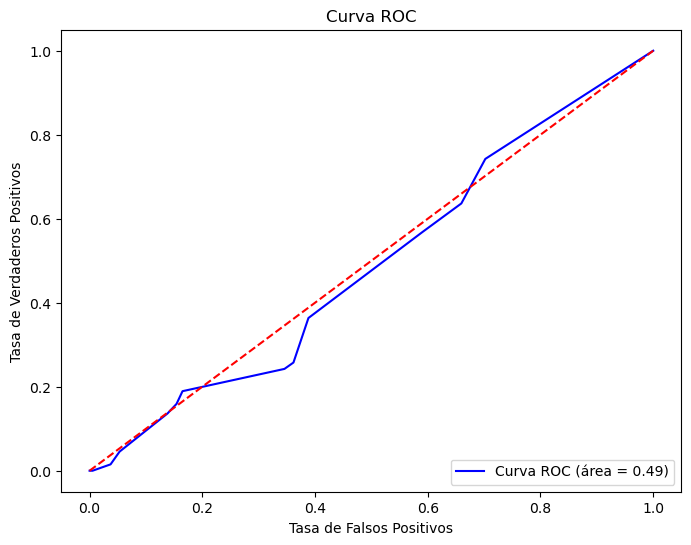

In [109]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Para la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=6)  # Cambia el número por la clase de interés
roc_auc = auc(fpr, tpr)

# Configurar la gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()


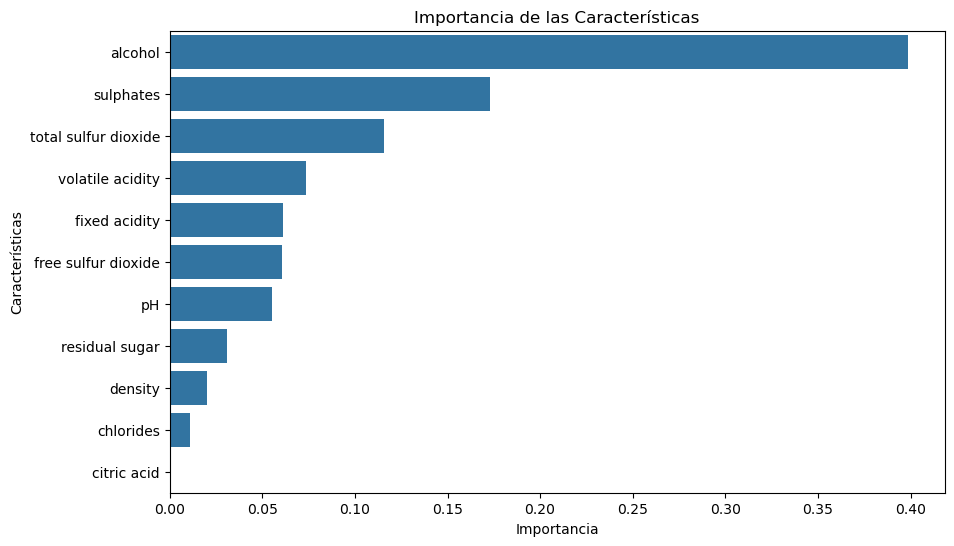

In [111]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns  # Asumiendo que X es un DataFrame

# Crear un DataFrame con las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Configurar la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
